In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from collections import Counter
import itertools
import logging
logging.basicConfig(format='%(asctime)s:%(levelname)s:%(message)s',level=logging.INFO)
logger = logging.getLogger(__name__)
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score
import tensorflow.contrib.layers as layers
import os
%matplotlib inline

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Data Preprocessing

In [25]:
data=pd.read_csv('./input/train_set.csv')
test=pd.read_csv('./input/test_set.csv')

#### Char Level

In [58]:
length_char=data['article'].apply(lambda x:len(x.split()))

In [59]:
length_char.describe()

count    102277.000000
mean       1177.100159
std        1348.431565
min          50.000000
25%         497.000000
50%         842.000000
75%        1408.000000
max       55804.000000
Name: article, dtype: float64

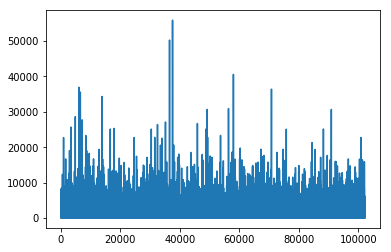

In [60]:
length_char.plot()

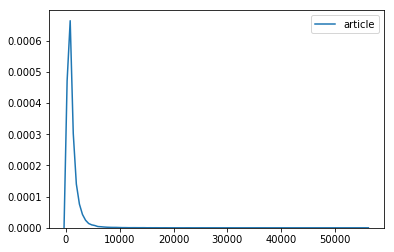

In [61]:
sns.kdeplot(length_char)

#### Word Level

In [62]:
length_word=data.word_seg.apply(lambda x:len(x.split()))

In [63]:
length_word.describe()

count    102277.000000
mean        716.954604
std         801.804540
min           6.000000
25%         305.000000
50%         514.000000
75%         862.000000
max       39759.000000
Name: word_seg, dtype: float64

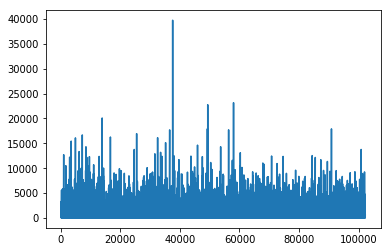

In [64]:
length_word.plot()

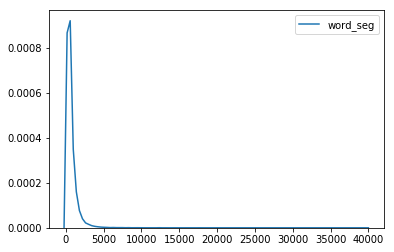

In [65]:
sns.kdeplot(length_word)

#### Split Train and Dev set

In [12]:
data['dev']=0
data['id']=data['id'].astype(np.int32)
def get_dev(row):
    if row['id']%10==0:
        row['dev']=1
    return row
data=data.apply(get_dev,axis=1)

#### Add Labels

In [13]:
def add_labels(row):
    row[row['class']]=1
    return row

In [14]:
labels=data['class'].unique().tolist()

In [15]:
labels.sort()

In [16]:
tmp=pd.DataFrame(columns=labels)
data=pd.concat([data,tmp],axis=1)
data=data.apply(add_labels,axis=1)
data=data.fillna(0)

In [18]:
data.to_csv('./input/train_set.csv',index=False)

### Embedding

In [43]:
data=pd.read_csv('./input/train_set.csv')

In [41]:
def all_char(sentences):
    char_count=dict(Counter(itertools.chain(*sentences)))
    chars=[char for char in char_count.keys()]
    return chars

def pad_sentence(sentence,valid_char,padding_char='PAD',max_length=1500):
    """
    If length of sentence less than max_length,pad it with padding_char.
    Otherwise,save the beginning and ending half max_length of sentence.
    """
    sentence=sentence.split()
    sentence=[x for x in sentence if x in valid_char]
    sen_len=len(sentence)
    if sen_len>max_length:
        sentence=sentence[:int(max_length/2)]+sentence[int(-max_length/2):]
    else:
        sentence+=(max_length-sen_len)*[padding_char]
    return np.array(sentence).reshape([1,max_length])

In [2]:
TOKEN='article'

In [28]:
train_token=pd.concat([data[TOKEN],test[TOKEN]],axis=0,ignore_index=True)

In [32]:
model=Word2Vec(train_token.apply(lambda x:x.split()).values,
                        size=128,window=10,min_count=20,workers=8,iter=40)

model.save(f'./model/{TOKEN}_128dim_40epoch_model')

2018-08-15 02:39:30,994:INFO:collecting all words and their counts
2018-08-15 02:39:30,995:INFO:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-08-15 02:39:32,843:INFO:PROGRESS: at sentence #10000, processed 11902100 words, keeping 8125 word types
2018-08-15 02:39:34,685:INFO:PROGRESS: at sentence #20000, processed 23634450 words, keeping 9228 word types
2018-08-15 02:39:36,540:INFO:PROGRESS: at sentence #30000, processed 35398739 words, keeping 9883 word types
2018-08-15 02:39:38,397:INFO:PROGRESS: at sentence #40000, processed 47277196 words, keeping 11129 word types
2018-08-15 02:39:40,318:INFO:PROGRESS: at sentence #50000, processed 59136750 words, keeping 11907 word types
2018-08-15 02:39:42,224:INFO:PROGRESS: at sentence #60000, processed 70924213 words, keeping 12431 word types
2018-08-15 02:39:44,106:INFO:PROGRESS: at sentence #70000, processed 82837524 words, keeping 12772 word types
2018-08-15 02:39:45,960:INFO:PROGRESS: at sentence #80000, processed 94

2018-08-15 02:40:55,822:INFO:EPOCH 1 - PROGRESS: at 37.89% examples, 1657570 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:40:56,829:INFO:EPOCH 1 - PROGRESS: at 38.72% examples, 1656512 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:40:57,831:INFO:EPOCH 1 - PROGRESS: at 39.60% examples, 1656997 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:40:58,838:INFO:EPOCH 1 - PROGRESS: at 40.44% examples, 1657310 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:40:59,838:INFO:EPOCH 1 - PROGRESS: at 41.29% examples, 1657936 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:41:00,842:INFO:EPOCH 1 - PROGRESS: at 42.14% examples, 1658212 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:41:01,852:INFO:EPOCH 1 - PROGRESS: at 42.98% examples, 1658435 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:41:02,854:INFO:EPOCH 1 - PROGRESS: at 43.85% examples, 1658716 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:41:03,856:INFO:EPOCH 1 - PROGRESS: at 44.77% examples, 1659254 words/s, in_qsize 8, out_qsize 0
2018-08-15

2018-08-15 02:42:11,070:INFO:EPOCH 1 - PROGRESS: at 99.19% examples, 1646258 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:42:12,004:INFO:worker thread finished; awaiting finish of 3 more threads
2018-08-15 02:42:12,005:INFO:worker thread finished; awaiting finish of 2 more threads
2018-08-15 02:42:12,012:INFO:worker thread finished; awaiting finish of 1 more threads
2018-08-15 02:42:12,013:INFO:worker thread finished; awaiting finish of 0 more threads
2018-08-15 02:42:12,014:INFO:EPOCH - 1 : training on 240845155 raw words (201467136 effective words) took 122.4s, 1646568 effective words/s
2018-08-15 02:42:13,017:INFO:EPOCH 2 - PROGRESS: at 0.83% examples, 1646861 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:42:14,023:INFO:EPOCH 2 - PROGRESS: at 1.66% examples, 1663828 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:42:15,025:INFO:EPOCH 2 - PROGRESS: at 2.53% examples, 1666818 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:42:16,036:INFO:EPOCH 2 - PROGRESS: at 3.34% examples, 1666914

2018-08-15 02:43:23,280:INFO:EPOCH 2 - PROGRESS: at 57.76% examples, 1636301 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:43:24,282:INFO:EPOCH 2 - PROGRESS: at 58.58% examples, 1636577 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:43:25,286:INFO:EPOCH 2 - PROGRESS: at 59.41% examples, 1636828 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:43:26,291:INFO:EPOCH 2 - PROGRESS: at 60.25% examples, 1637319 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:43:27,299:INFO:EPOCH 2 - PROGRESS: at 61.07% examples, 1637792 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:43:28,301:INFO:EPOCH 2 - PROGRESS: at 61.91% examples, 1638357 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:43:29,301:INFO:EPOCH 2 - PROGRESS: at 62.76% examples, 1638899 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:43:30,301:INFO:EPOCH 2 - PROGRESS: at 63.60% examples, 1639439 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:43:31,303:INFO:EPOCH 2 - PROGRESS: at 64.43% examples, 1639715 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 02:44:34,705:INFO:EPOCH 3 - PROGRESS: at 12.73% examples, 1505353 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:44:35,706:INFO:EPOCH 3 - PROGRESS: at 13.44% examples, 1500193 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:44:36,707:INFO:EPOCH 3 - PROGRESS: at 14.14% examples, 1495307 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:44:37,714:INFO:EPOCH 3 - PROGRESS: at 14.85% examples, 1491220 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:44:38,716:INFO:EPOCH 3 - PROGRESS: at 15.56% examples, 1488658 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:44:39,726:INFO:EPOCH 3 - PROGRESS: at 16.23% examples, 1484493 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:44:40,739:INFO:EPOCH 3 - PROGRESS: at 16.94% examples, 1481238 words/s, in_qsize 6, out_qsize 1
2018-08-15 02:44:41,744:INFO:EPOCH 3 - PROGRESS: at 17.65% examples, 1479159 words/s, in_qsize 8, out_qsize 0
2018-08-15 02:44:42,750:INFO:EPOCH 3 - PROGRESS: at 18.35% examples, 1475529 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 02:45:49,995:INFO:EPOCH 3 - PROGRESS: at 72.78% examples, 1590066 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:45:50,999:INFO:EPOCH 3 - PROGRESS: at 73.63% examples, 1591116 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:45:51,999:INFO:EPOCH 3 - PROGRESS: at 74.46% examples, 1592092 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:45:53,000:INFO:EPOCH 3 - PROGRESS: at 75.27% examples, 1592985 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:45:54,001:INFO:EPOCH 3 - PROGRESS: at 76.13% examples, 1593824 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:45:55,005:INFO:EPOCH 3 - PROGRESS: at 76.98% examples, 1594766 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:45:56,005:INFO:EPOCH 3 - PROGRESS: at 77.82% examples, 1595682 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:45:57,014:INFO:EPOCH 3 - PROGRESS: at 78.64% examples, 1595617 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:45:58,015:INFO:EPOCH 3 - PROGRESS: at 79.47% examples, 1596534 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 02:47:01,726:INFO:EPOCH 4 - PROGRESS: at 31.98% examples, 1651396 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:47:02,727:INFO:EPOCH 4 - PROGRESS: at 32.79% examples, 1651596 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:47:03,728:INFO:EPOCH 4 - PROGRESS: at 33.64% examples, 1651873 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:47:04,729:INFO:EPOCH 4 - PROGRESS: at 34.43% examples, 1652276 words/s, in_qsize 8, out_qsize 0
2018-08-15 02:47:05,730:INFO:EPOCH 4 - PROGRESS: at 35.27% examples, 1652604 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:47:06,734:INFO:EPOCH 4 - PROGRESS: at 35.99% examples, 1648469 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:47:07,737:INFO:EPOCH 4 - PROGRESS: at 36.72% examples, 1643103 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:47:08,740:INFO:EPOCH 4 - PROGRESS: at 37.44% examples, 1638453 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:47:09,750:INFO:EPOCH 4 - PROGRESS: at 38.14% examples, 1633296 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 02:48:16,983:INFO:EPOCH 4 - PROGRESS: at 91.82% examples, 1617668 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:48:17,984:INFO:EPOCH 4 - PROGRESS: at 92.51% examples, 1615842 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:48:18,985:INFO:EPOCH 4 - PROGRESS: at 93.20% examples, 1613864 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:48:19,986:INFO:EPOCH 4 - PROGRESS: at 93.92% examples, 1612138 words/s, in_qsize 8, out_qsize 0
2018-08-15 02:48:20,987:INFO:EPOCH 4 - PROGRESS: at 94.73% examples, 1611945 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:48:21,987:INFO:EPOCH 4 - PROGRESS: at 95.54% examples, 1612372 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:48:22,993:INFO:EPOCH 4 - PROGRESS: at 96.39% examples, 1612772 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:48:23,994:INFO:EPOCH 4 - PROGRESS: at 97.21% examples, 1613146 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:48:25,000:INFO:EPOCH 4 - PROGRESS: at 98.00% examples, 1613462 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 02:49:28,602:INFO:EPOCH 5 - PROGRESS: at 48.66% examples, 1599549 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:49:29,606:INFO:EPOCH 5 - PROGRESS: at 49.48% examples, 1600696 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:49:30,609:INFO:EPOCH 5 - PROGRESS: at 50.31% examples, 1601936 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:49:31,610:INFO:EPOCH 5 - PROGRESS: at 51.14% examples, 1602929 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:49:32,613:INFO:EPOCH 5 - PROGRESS: at 51.96% examples, 1603967 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:49:33,614:INFO:EPOCH 5 - PROGRESS: at 52.81% examples, 1604971 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:49:34,618:INFO:EPOCH 5 - PROGRESS: at 53.63% examples, 1605700 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:49:35,622:INFO:EPOCH 5 - PROGRESS: at 54.44% examples, 1606847 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:49:36,624:INFO:EPOCH 5 - PROGRESS: at 55.24% examples, 1607870 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 02:50:40,100:INFO:EPOCH 6 - PROGRESS: at 6.08% examples, 1539628 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:50:41,103:INFO:EPOCH 6 - PROGRESS: at 6.90% examples, 1547179 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:50:42,105:INFO:EPOCH 6 - PROGRESS: at 7.73% examples, 1559581 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:50:43,106:INFO:EPOCH 6 - PROGRESS: at 8.61% examples, 1570339 words/s, in_qsize 6, out_qsize 1
2018-08-15 02:50:44,108:INFO:EPOCH 6 - PROGRESS: at 9.41% examples, 1578408 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:50:45,109:INFO:EPOCH 6 - PROGRESS: at 10.22% examples, 1586594 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:50:46,110:INFO:EPOCH 6 - PROGRESS: at 11.03% examples, 1592064 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:50:47,122:INFO:EPOCH 6 - PROGRESS: at 11.91% examples, 1597414 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:50:48,129:INFO:EPOCH 6 - PROGRESS: at 12.72% examples, 1601649 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:5

2018-08-15 02:51:55,430:INFO:EPOCH 6 - PROGRESS: at 64.08% examples, 1551665 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:51:56,431:INFO:EPOCH 6 - PROGRESS: at 64.95% examples, 1553201 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:51:57,434:INFO:EPOCH 6 - PROGRESS: at 65.77% examples, 1554440 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:51:58,438:INFO:EPOCH 6 - PROGRESS: at 66.55% examples, 1555667 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:51:59,441:INFO:EPOCH 6 - PROGRESS: at 67.40% examples, 1557052 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:52:00,443:INFO:EPOCH 6 - PROGRESS: at 68.26% examples, 1558277 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:52:01,445:INFO:EPOCH 6 - PROGRESS: at 69.08% examples, 1559332 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:52:02,456:INFO:EPOCH 6 - PROGRESS: at 69.92% examples, 1560614 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:52:03,458:INFO:EPOCH 6 - PROGRESS: at 70.74% examples, 1561774 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 02:53:06,912:INFO:EPOCH 7 - PROGRESS: at 20.18% examples, 1618383 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:53:07,913:INFO:EPOCH 7 - PROGRESS: at 21.02% examples, 1621015 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:53:08,917:INFO:EPOCH 7 - PROGRESS: at 21.85% examples, 1624172 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:53:09,922:INFO:EPOCH 7 - PROGRESS: at 22.68% examples, 1625964 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:53:10,924:INFO:EPOCH 7 - PROGRESS: at 23.52% examples, 1627850 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:53:11,930:INFO:EPOCH 7 - PROGRESS: at 24.33% examples, 1629320 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:53:12,931:INFO:EPOCH 7 - PROGRESS: at 25.14% examples, 1631085 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:53:13,937:INFO:EPOCH 7 - PROGRESS: at 26.00% examples, 1633105 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:53:14,940:INFO:EPOCH 7 - PROGRESS: at 26.82% examples, 1634745 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 02:54:22,196:INFO:EPOCH 7 - PROGRESS: at 82.45% examples, 1655488 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:54:23,197:INFO:EPOCH 7 - PROGRESS: at 83.26% examples, 1655665 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:54:24,209:INFO:EPOCH 7 - PROGRESS: at 84.09% examples, 1655741 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:54:25,213:INFO:EPOCH 7 - PROGRESS: at 84.92% examples, 1656043 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:54:26,216:INFO:EPOCH 7 - PROGRESS: at 85.76% examples, 1656272 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:54:27,217:INFO:EPOCH 7 - PROGRESS: at 86.59% examples, 1656336 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:54:28,223:INFO:EPOCH 7 - PROGRESS: at 87.40% examples, 1656469 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:54:29,224:INFO:EPOCH 7 - PROGRESS: at 88.23% examples, 1656603 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:54:30,227:INFO:EPOCH 7 - PROGRESS: at 89.09% examples, 1656745 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 02:55:33,786:INFO:EPOCH 8 - PROGRESS: at 37.37% examples, 1565581 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:55:34,787:INFO:EPOCH 8 - PROGRESS: at 38.19% examples, 1567721 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:55:35,790:INFO:EPOCH 8 - PROGRESS: at 39.06% examples, 1569158 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:55:36,792:INFO:EPOCH 8 - PROGRESS: at 39.92% examples, 1570728 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:55:37,793:INFO:EPOCH 8 - PROGRESS: at 40.76% examples, 1572886 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:55:38,802:INFO:EPOCH 8 - PROGRESS: at 41.59% examples, 1574541 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:55:39,803:INFO:EPOCH 8 - PROGRESS: at 42.44% examples, 1576184 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:55:40,810:INFO:EPOCH 8 - PROGRESS: at 43.29% examples, 1577574 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:55:41,810:INFO:EPOCH 8 - PROGRESS: at 44.18% examples, 1579044 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 02:56:49,020:INFO:EPOCH 8 - PROGRESS: at 97.54% examples, 1592099 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:56:50,021:INFO:EPOCH 8 - PROGRESS: at 98.32% examples, 1592632 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:56:51,022:INFO:EPOCH 8 - PROGRESS: at 99.19% examples, 1593272 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:56:51,961:INFO:worker thread finished; awaiting finish of 3 more threads
2018-08-15 02:56:51,962:INFO:worker thread finished; awaiting finish of 2 more threads
2018-08-15 02:56:51,967:INFO:worker thread finished; awaiting finish of 1 more threads
2018-08-15 02:56:51,969:INFO:worker thread finished; awaiting finish of 0 more threads
2018-08-15 02:56:51,969:INFO:EPOCH - 8 : training on 240845155 raw words (201463338 effective words) took 126.4s, 1593930 effective words/s
2018-08-15 02:56:52,973:INFO:EPOCH 9 - PROGRESS: at 0.84% examples, 1667412 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:56:53,974:INFO:EPOCH 9 - PROGRESS: at 1.67% examples, 16707

2018-08-15 02:58:01,217:INFO:EPOCH 9 - PROGRESS: at 55.96% examples, 1629860 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:58:02,226:INFO:EPOCH 9 - PROGRESS: at 56.75% examples, 1630208 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:58:03,237:INFO:EPOCH 9 - PROGRESS: at 57.56% examples, 1631005 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:58:04,247:INFO:EPOCH 9 - PROGRESS: at 58.28% examples, 1627820 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:58:05,250:INFO:EPOCH 9 - PROGRESS: at 58.98% examples, 1624695 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:58:06,253:INFO:EPOCH 9 - PROGRESS: at 59.68% examples, 1621704 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:58:07,267:INFO:EPOCH 9 - PROGRESS: at 60.39% examples, 1618729 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:58:08,267:INFO:EPOCH 9 - PROGRESS: at 61.09% examples, 1616334 words/s, in_qsize 8, out_qsize 0
2018-08-15 02:58:09,276:INFO:EPOCH 9 - PROGRESS: at 61.92% examples, 1616999 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 02:59:12,821:INFO:EPOCH 10 - PROGRESS: at 13.19% examples, 1657643 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:59:13,822:INFO:EPOCH 10 - PROGRESS: at 14.01% examples, 1657579 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:59:14,827:INFO:EPOCH 10 - PROGRESS: at 14.83% examples, 1657208 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:59:15,832:INFO:EPOCH 10 - PROGRESS: at 15.65% examples, 1656633 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:59:16,834:INFO:EPOCH 10 - PROGRESS: at 16.44% examples, 1656736 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:59:17,837:INFO:EPOCH 10 - PROGRESS: at 17.26% examples, 1656639 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:59:18,843:INFO:EPOCH 10 - PROGRESS: at 18.11% examples, 1657263 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:59:19,845:INFO:EPOCH 10 - PROGRESS: at 18.97% examples, 1657599 words/s, in_qsize 7, out_qsize 0
2018-08-15 02:59:20,853:INFO:EPOCH 10 - PROGRESS: at 19.80% examples, 1656744 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:00:27,130:INFO:EPOCH 10 - PROGRESS: at 73.29% examples, 1636906 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:00:28,134:INFO:EPOCH 10 - PROGRESS: at 74.12% examples, 1637081 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:00:29,134:INFO:EPOCH 10 - PROGRESS: at 74.94% examples, 1637500 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:00:30,138:INFO:EPOCH 10 - PROGRESS: at 75.78% examples, 1637674 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:00:31,147:INFO:EPOCH 10 - PROGRESS: at 76.63% examples, 1637863 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:00:32,150:INFO:EPOCH 10 - PROGRESS: at 77.47% examples, 1638182 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:00:33,150:INFO:EPOCH 10 - PROGRESS: at 78.18% examples, 1635723 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:00:34,155:INFO:EPOCH 10 - PROGRESS: at 78.95% examples, 1635010 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:00:35,156:INFO:EPOCH 10 - PROGRESS: at 79.66% examples, 1632799 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:01:38,148:INFO:EPOCH 11 - PROGRESS: at 27.86% examples, 1554802 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:01:39,156:INFO:EPOCH 11 - PROGRESS: at 28.69% examples, 1558087 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:01:40,156:INFO:EPOCH 11 - PROGRESS: at 29.54% examples, 1561590 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:01:41,156:INFO:EPOCH 11 - PROGRESS: at 30.37% examples, 1564614 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:01:42,161:INFO:EPOCH 11 - PROGRESS: at 31.18% examples, 1567761 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:01:43,164:INFO:EPOCH 11 - PROGRESS: at 32.01% examples, 1570935 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:01:44,168:INFO:EPOCH 11 - PROGRESS: at 32.83% examples, 1573125 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:01:45,177:INFO:EPOCH 11 - PROGRESS: at 33.68% examples, 1575524 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:01:46,181:INFO:EPOCH 11 - PROGRESS: at 34.48% examples, 1578139 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:02:52,480:INFO:EPOCH 11 - PROGRESS: at 86.56% examples, 1579585 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:02:53,493:INFO:EPOCH 11 - PROGRESS: at 87.24% examples, 1578108 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:02:54,493:INFO:EPOCH 11 - PROGRESS: at 87.95% examples, 1576772 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:02:55,493:INFO:EPOCH 11 - PROGRESS: at 88.65% examples, 1575428 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:02:56,493:INFO:EPOCH 11 - PROGRESS: at 89.47% examples, 1575510 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:02:57,494:INFO:EPOCH 11 - PROGRESS: at 90.32% examples, 1576426 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:02:58,494:INFO:EPOCH 11 - PROGRESS: at 91.18% examples, 1577193 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:02:59,497:INFO:EPOCH 11 - PROGRESS: at 92.02% examples, 1578142 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:03:00,497:INFO:EPOCH 11 - PROGRESS: at 92.84% examples, 1579026 words/s, in_qsize 8, out_qsize 0
2

2018-08-15 03:04:03,253:INFO:EPOCH 12 - PROGRESS: at 44.84% examples, 1662170 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:04:04,255:INFO:EPOCH 12 - PROGRESS: at 45.65% examples, 1662487 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:04:05,255:INFO:EPOCH 12 - PROGRESS: at 46.51% examples, 1662478 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:04:06,265:INFO:EPOCH 12 - PROGRESS: at 47.28% examples, 1661861 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:04:07,265:INFO:EPOCH 12 - PROGRESS: at 48.09% examples, 1662082 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:04:08,276:INFO:EPOCH 12 - PROGRESS: at 48.82% examples, 1659239 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:04:09,282:INFO:EPOCH 12 - PROGRESS: at 49.48% examples, 1654549 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:04:10,285:INFO:EPOCH 12 - PROGRESS: at 50.30% examples, 1654322 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:04:11,290:INFO:EPOCH 12 - PROGRESS: at 51.13% examples, 1654416 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:05:13,985:INFO:EPOCH 13 - PROGRESS: at 1.67% examples, 1673064 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:05:14,987:INFO:EPOCH 13 - PROGRESS: at 2.54% examples, 1675280 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:05:15,988:INFO:EPOCH 13 - PROGRESS: at 3.35% examples, 1675889 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:05:16,993:INFO:EPOCH 13 - PROGRESS: at 4.16% examples, 1672741 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:05:18,001:INFO:EPOCH 13 - PROGRESS: at 4.98% examples, 1670878 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:05:19,006:INFO:EPOCH 13 - PROGRESS: at 5.78% examples, 1670830 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:05:20,011:INFO:EPOCH 13 - PROGRESS: at 6.61% examples, 1668819 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:05:21,016:INFO:EPOCH 13 - PROGRESS: at 7.47% examples, 1668142 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:05:22,019:INFO:EPOCH 13 - PROGRESS: at 8.31% examples, 1669013 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 03:06:28,228:INFO:EPOCH 13 - PROGRESS: at 60.00% examples, 1588300 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:06:29,229:INFO:EPOCH 13 - PROGRESS: at 60.83% examples, 1589541 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:06:30,233:INFO:EPOCH 13 - PROGRESS: at 61.66% examples, 1590687 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:06:31,235:INFO:EPOCH 13 - PROGRESS: at 62.53% examples, 1591653 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:06:32,236:INFO:EPOCH 13 - PROGRESS: at 63.35% examples, 1592875 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:06:33,239:INFO:EPOCH 13 - PROGRESS: at 64.18% examples, 1593825 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:06:34,240:INFO:EPOCH 13 - PROGRESS: at 65.04% examples, 1594873 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:06:35,250:INFO:EPOCH 13 - PROGRESS: at 65.86% examples, 1595740 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:06:36,253:INFO:EPOCH 13 - PROGRESS: at 66.64% examples, 1596518 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:07:38,579:INFO:EPOCH 14 - PROGRESS: at 16.41% examples, 1573742 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:07:39,585:INFO:EPOCH 14 - PROGRESS: at 17.24% examples, 1578659 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:07:40,588:INFO:EPOCH 14 - PROGRESS: at 18.10% examples, 1583318 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:07:41,590:INFO:EPOCH 14 - PROGRESS: at 18.97% examples, 1587645 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:07:42,590:INFO:EPOCH 14 - PROGRESS: at 19.81% examples, 1590797 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:07:43,601:INFO:EPOCH 14 - PROGRESS: at 20.66% examples, 1594383 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:07:44,601:INFO:EPOCH 14 - PROGRESS: at 21.50% examples, 1597736 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:07:45,604:INFO:EPOCH 14 - PROGRESS: at 22.31% examples, 1600597 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:07:46,607:INFO:EPOCH 14 - PROGRESS: at 23.16% examples, 1603615 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:08:52,868:INFO:EPOCH 14 - PROGRESS: at 76.90% examples, 1626585 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:08:53,869:INFO:EPOCH 14 - PROGRESS: at 77.73% examples, 1626972 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:08:54,869:INFO:EPOCH 14 - PROGRESS: at 78.58% examples, 1627477 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:08:55,871:INFO:EPOCH 14 - PROGRESS: at 79.40% examples, 1627768 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:08:56,875:INFO:EPOCH 14 - PROGRESS: at 80.21% examples, 1627998 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:08:57,880:INFO:EPOCH 14 - PROGRESS: at 81.08% examples, 1628246 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:08:58,886:INFO:EPOCH 14 - PROGRESS: at 81.90% examples, 1628704 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:08:59,887:INFO:EPOCH 14 - PROGRESS: at 82.72% examples, 1629097 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:09:00,890:INFO:EPOCH 14 - PROGRESS: at 83.53% examples, 1629100 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:10:03,887:INFO:EPOCH 15 - PROGRESS: at 33.11% examples, 1627124 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:10:04,892:INFO:EPOCH 15 - PROGRESS: at 33.94% examples, 1628051 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:10:05,895:INFO:EPOCH 15 - PROGRESS: at 34.76% examples, 1629779 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:10:06,904:INFO:EPOCH 15 - PROGRESS: at 35.61% examples, 1631141 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:10:07,912:INFO:EPOCH 15 - PROGRESS: at 36.48% examples, 1632389 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:10:08,918:INFO:EPOCH 15 - PROGRESS: at 37.33% examples, 1633177 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:10:09,919:INFO:EPOCH 15 - PROGRESS: at 38.17% examples, 1634387 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:10:10,922:INFO:EPOCH 15 - PROGRESS: at 39.05% examples, 1635163 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:10:11,928:INFO:EPOCH 15 - PROGRESS: at 39.95% examples, 1636359 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:11:18,185:INFO:EPOCH 15 - PROGRESS: at 92.50% examples, 1614895 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:11:19,188:INFO:EPOCH 15 - PROGRESS: at 93.33% examples, 1615441 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:11:20,192:INFO:EPOCH 15 - PROGRESS: at 94.20% examples, 1616214 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:11:21,196:INFO:EPOCH 15 - PROGRESS: at 95.03% examples, 1616748 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:11:22,198:INFO:EPOCH 15 - PROGRESS: at 95.89% examples, 1617335 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:11:23,203:INFO:EPOCH 15 - PROGRESS: at 96.73% examples, 1617866 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:11:24,206:INFO:EPOCH 15 - PROGRESS: at 97.56% examples, 1618435 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:11:25,218:INFO:EPOCH 15 - PROGRESS: at 98.37% examples, 1618863 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:11:26,222:INFO:EPOCH 15 - PROGRESS: at 99.24% examples, 1619426 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:12:29,341:INFO:EPOCH 16 - PROGRESS: at 51.67% examples, 1672203 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:12:30,345:INFO:EPOCH 16 - PROGRESS: at 52.50% examples, 1672052 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:12:31,349:INFO:EPOCH 16 - PROGRESS: at 53.35% examples, 1672019 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:12:32,350:INFO:EPOCH 16 - PROGRESS: at 54.15% examples, 1672047 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:12:33,363:INFO:EPOCH 16 - PROGRESS: at 54.95% examples, 1671893 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:12:34,366:INFO:EPOCH 16 - PROGRESS: at 55.76% examples, 1671832 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:12:35,368:INFO:EPOCH 16 - PROGRESS: at 56.56% examples, 1671933 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:12:36,369:INFO:EPOCH 16 - PROGRESS: at 57.38% examples, 1672118 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:12:37,369:INFO:EPOCH 16 - PROGRESS: at 58.19% examples, 1672087 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:13:40,402:INFO:EPOCH 17 - PROGRESS: at 9.89% examples, 1657806 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:13:41,408:INFO:EPOCH 17 - PROGRESS: at 10.71% examples, 1660530 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:13:42,410:INFO:EPOCH 17 - PROGRESS: at 11.54% examples, 1661080 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:13:43,413:INFO:EPOCH 17 - PROGRESS: at 12.39% examples, 1661188 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:13:44,414:INFO:EPOCH 17 - PROGRESS: at 13.20% examples, 1659737 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:13:45,416:INFO:EPOCH 17 - PROGRESS: at 14.02% examples, 1659839 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:13:46,419:INFO:EPOCH 17 - PROGRESS: at 14.85% examples, 1659788 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:13:47,419:INFO:EPOCH 17 - PROGRESS: at 15.56% examples, 1647200 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:13:48,422:INFO:EPOCH 17 - PROGRESS: at 16.26% examples, 1638243 words/s, in_qsize 7, out_qsize 0
20

2018-08-15 03:14:54,685:INFO:EPOCH 17 - PROGRESS: at 70.36% examples, 1644367 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:14:55,686:INFO:EPOCH 17 - PROGRESS: at 71.21% examples, 1644851 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:14:56,693:INFO:EPOCH 17 - PROGRESS: at 72.00% examples, 1644821 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:14:57,695:INFO:EPOCH 17 - PROGRESS: at 72.84% examples, 1645120 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:14:58,701:INFO:EPOCH 17 - PROGRESS: at 73.68% examples, 1645591 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:14:59,713:INFO:EPOCH 17 - PROGRESS: at 74.49% examples, 1645580 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:15:00,716:INFO:EPOCH 17 - PROGRESS: at 75.28% examples, 1645320 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:15:01,722:INFO:EPOCH 17 - PROGRESS: at 76.13% examples, 1645320 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:15:02,725:INFO:EPOCH 17 - PROGRESS: at 76.97% examples, 1645497 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:16:05,234:INFO:EPOCH 18 - PROGRESS: at 26.44% examples, 1612681 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:16:06,236:INFO:EPOCH 18 - PROGRESS: at 27.26% examples, 1613413 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:16:07,239:INFO:EPOCH 18 - PROGRESS: at 28.10% examples, 1615003 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:16:08,245:INFO:EPOCH 18 - PROGRESS: at 28.90% examples, 1615974 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:16:09,254:INFO:EPOCH 18 - PROGRESS: at 29.72% examples, 1615802 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:16:10,258:INFO:EPOCH 18 - PROGRESS: at 30.53% examples, 1616383 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:16:11,264:INFO:EPOCH 18 - PROGRESS: at 31.34% examples, 1617849 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:16:12,272:INFO:EPOCH 18 - PROGRESS: at 32.16% examples, 1619294 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:16:13,274:INFO:EPOCH 18 - PROGRESS: at 32.97% examples, 1619611 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:17:19,555:INFO:EPOCH 18 - PROGRESS: at 84.25% examples, 1581399 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:17:20,562:INFO:EPOCH 18 - PROGRESS: at 85.04% examples, 1581571 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:17:21,567:INFO:EPOCH 18 - PROGRESS: at 85.85% examples, 1581981 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:17:22,570:INFO:EPOCH 18 - PROGRESS: at 86.56% examples, 1580382 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:17:23,572:INFO:EPOCH 18 - PROGRESS: at 87.22% examples, 1578767 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:17:24,574:INFO:EPOCH 18 - PROGRESS: at 88.05% examples, 1579260 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:17:25,582:INFO:EPOCH 18 - PROGRESS: at 88.87% examples, 1579682 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:17:26,584:INFO:EPOCH 18 - PROGRESS: at 89.69% examples, 1580150 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:17:27,584:INFO:EPOCH 18 - PROGRESS: at 90.52% examples, 1580684 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:18:30,514:INFO:EPOCH 19 - PROGRESS: at 41.50% examples, 1633604 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:18:31,515:INFO:EPOCH 19 - PROGRESS: at 42.21% examples, 1628867 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:18:32,517:INFO:EPOCH 19 - PROGRESS: at 42.96% examples, 1626459 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:18:33,521:INFO:EPOCH 19 - PROGRESS: at 43.84% examples, 1627311 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:18:34,523:INFO:EPOCH 19 - PROGRESS: at 44.73% examples, 1628067 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:18:35,524:INFO:EPOCH 19 - PROGRESS: at 45.56% examples, 1629167 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:18:36,526:INFO:EPOCH 19 - PROGRESS: at 46.39% examples, 1629944 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:18:37,533:INFO:EPOCH 19 - PROGRESS: at 47.19% examples, 1629763 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:18:38,535:INFO:EPOCH 19 - PROGRESS: at 47.97% examples, 1630112 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:19:42,794:INFO:worker thread finished; awaiting finish of 1 more threads
2018-08-15 03:19:42,795:INFO:worker thread finished; awaiting finish of 0 more threads
2018-08-15 03:19:42,796:INFO:EPOCH - 19 : training on 240845155 raw words (201473111 effective words) took 123.5s, 1631674 effective words/s
2018-08-15 03:19:43,800:INFO:EPOCH 20 - PROGRESS: at 0.82% examples, 1635992 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:19:44,800:INFO:EPOCH 20 - PROGRESS: at 1.66% examples, 1666877 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:19:45,803:INFO:EPOCH 20 - PROGRESS: at 2.53% examples, 1668868 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:19:46,812:INFO:EPOCH 20 - PROGRESS: at 3.34% examples, 1668841 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:19:47,813:INFO:EPOCH 20 - PROGRESS: at 4.15% examples, 1666572 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:19:48,822:INFO:EPOCH 20 - PROGRESS: at 4.94% examples, 1659115 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:19:49,829:I

2018-08-15 03:20:56,091:INFO:EPOCH 20 - PROGRESS: at 58.71% examples, 1617322 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:20:57,101:INFO:EPOCH 20 - PROGRESS: at 59.57% examples, 1618192 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:20:58,102:INFO:EPOCH 20 - PROGRESS: at 60.41% examples, 1619052 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:20:59,107:INFO:EPOCH 20 - PROGRESS: at 61.22% examples, 1619777 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:21:00,110:INFO:EPOCH 20 - PROGRESS: at 62.07% examples, 1620634 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:21:01,115:INFO:EPOCH 20 - PROGRESS: at 62.92% examples, 1621161 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:21:02,121:INFO:EPOCH 20 - PROGRESS: at 63.73% examples, 1621297 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:21:03,126:INFO:EPOCH 20 - PROGRESS: at 64.58% examples, 1621898 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:21:04,130:INFO:EPOCH 20 - PROGRESS: at 65.41% examples, 1622280 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:22:07,071:INFO:EPOCH 21 - PROGRESS: at 17.18% examples, 1646946 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:22:08,073:INFO:EPOCH 21 - PROGRESS: at 18.03% examples, 1649518 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:22:09,080:INFO:EPOCH 21 - PROGRESS: at 18.90% examples, 1651163 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:22:10,082:INFO:EPOCH 21 - PROGRESS: at 19.76% examples, 1652569 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:22:11,083:INFO:EPOCH 21 - PROGRESS: at 20.60% examples, 1654133 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:22:12,086:INFO:EPOCH 21 - PROGRESS: at 21.46% examples, 1655906 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:22:13,089:INFO:EPOCH 21 - PROGRESS: at 22.27% examples, 1656653 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:22:14,092:INFO:EPOCH 21 - PROGRESS: at 23.11% examples, 1656686 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:22:15,101:INFO:EPOCH 21 - PROGRESS: at 23.92% examples, 1655856 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:23:21,386:INFO:EPOCH 21 - PROGRESS: at 76.19% examples, 1611297 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:23:22,392:INFO:EPOCH 21 - PROGRESS: at 77.03% examples, 1611739 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:23:23,396:INFO:EPOCH 21 - PROGRESS: at 77.86% examples, 1612327 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:23:24,399:INFO:EPOCH 21 - PROGRESS: at 78.72% examples, 1613016 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:23:25,404:INFO:EPOCH 21 - PROGRESS: at 79.55% examples, 1613640 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:23:26,407:INFO:EPOCH 21 - PROGRESS: at 80.39% examples, 1614430 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:23:27,412:INFO:EPOCH 21 - PROGRESS: at 81.26% examples, 1615064 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:23:28,413:INFO:EPOCH 21 - PROGRESS: at 82.09% examples, 1615848 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:23:29,415:INFO:EPOCH 21 - PROGRESS: at 82.91% examples, 1616275 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:24:32,091:INFO:EPOCH 22 - PROGRESS: at 34.36% examples, 1647674 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:24:33,094:INFO:EPOCH 22 - PROGRESS: at 35.21% examples, 1648520 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:24:34,099:INFO:EPOCH 22 - PROGRESS: at 36.03% examples, 1648795 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:24:35,102:INFO:EPOCH 22 - PROGRESS: at 36.75% examples, 1643515 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:24:36,105:INFO:EPOCH 22 - PROGRESS: at 37.58% examples, 1643436 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:24:37,108:INFO:EPOCH 22 - PROGRESS: at 38.46% examples, 1644474 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:24:38,110:INFO:EPOCH 22 - PROGRESS: at 39.32% examples, 1644942 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:24:39,112:INFO:EPOCH 22 - PROGRESS: at 40.18% examples, 1645991 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:24:40,119:INFO:EPOCH 22 - PROGRESS: at 41.04% examples, 1646870 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:25:46,391:INFO:EPOCH 22 - PROGRESS: at 94.76% examples, 1638952 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:25:47,392:INFO:EPOCH 22 - PROGRESS: at 95.44% examples, 1637024 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:25:48,393:INFO:EPOCH 22 - PROGRESS: at 96.20% examples, 1635797 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:25:49,402:INFO:EPOCH 22 - PROGRESS: at 97.05% examples, 1636185 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:25:50,403:INFO:EPOCH 22 - PROGRESS: at 97.85% examples, 1636609 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:25:51,408:INFO:EPOCH 22 - PROGRESS: at 98.69% examples, 1636991 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:25:52,409:INFO:EPOCH 22 - PROGRESS: at 99.58% examples, 1637526 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:25:52,910:INFO:worker thread finished; awaiting finish of 3 more threads
2018-08-15 03:25:52,911:INFO:worker thread finished; awaiting finish of 2 more threads
2018-08-15 03:25:52,914:INFO:worker thread finish

2018-08-15 03:26:57,145:INFO:EPOCH 23 - PROGRESS: at 53.13% examples, 1665215 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:26:58,145:INFO:EPOCH 23 - PROGRESS: at 53.92% examples, 1665346 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:26:59,149:INFO:EPOCH 23 - PROGRESS: at 54.74% examples, 1665819 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:27:00,151:INFO:EPOCH 23 - PROGRESS: at 55.55% examples, 1666224 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:27:01,156:INFO:EPOCH 23 - PROGRESS: at 56.36% examples, 1666651 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:27:02,160:INFO:EPOCH 23 - PROGRESS: at 57.16% examples, 1665314 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:27:03,162:INFO:EPOCH 23 - PROGRESS: at 57.82% examples, 1661942 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:27:04,162:INFO:EPOCH 23 - PROGRESS: at 58.53% examples, 1658650 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:27:05,170:INFO:EPOCH 23 - PROGRESS: at 59.24% examples, 1655123 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:28:08,336:INFO:EPOCH 24 - PROGRESS: at 9.50% examples, 1464575 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:28:09,343:INFO:EPOCH 24 - PROGRESS: at 10.29% examples, 1480431 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:28:10,349:INFO:EPOCH 24 - PROGRESS: at 11.12% examples, 1494289 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:28:11,355:INFO:EPOCH 24 - PROGRESS: at 12.00% examples, 1505395 words/s, in_qsize 6, out_qsize 3
2018-08-15 03:28:12,360:INFO:EPOCH 24 - PROGRESS: at 12.84% examples, 1517085 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:28:13,367:INFO:EPOCH 24 - PROGRESS: at 13.68% examples, 1525633 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:28:14,375:INFO:EPOCH 24 - PROGRESS: at 14.52% examples, 1534044 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:28:15,378:INFO:EPOCH 24 - PROGRESS: at 15.35% examples, 1540898 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:28:16,380:INFO:EPOCH 24 - PROGRESS: at 16.14% examples, 1546953 words/s, in_qsize 7, out_qsize 0
20

2018-08-15 03:29:22,612:INFO:EPOCH 24 - PROGRESS: at 67.02% examples, 1549054 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:29:23,621:INFO:EPOCH 24 - PROGRESS: at 67.77% examples, 1547738 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:29:24,625:INFO:EPOCH 24 - PROGRESS: at 68.49% examples, 1546384 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:29:25,628:INFO:EPOCH 24 - PROGRESS: at 69.21% examples, 1545167 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:29:26,636:INFO:EPOCH 24 - PROGRESS: at 69.94% examples, 1544043 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:29:27,637:INFO:EPOCH 24 - PROGRESS: at 70.64% examples, 1542971 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:29:28,641:INFO:EPOCH 24 - PROGRESS: at 71.43% examples, 1543080 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:29:29,653:INFO:EPOCH 24 - PROGRESS: at 72.23% examples, 1544396 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:29:30,653:INFO:EPOCH 24 - PROGRESS: at 73.07% examples, 1545943 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:30:33,777:INFO:EPOCH 25 - PROGRESS: at 25.91% examples, 1681211 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:30:34,778:INFO:EPOCH 25 - PROGRESS: at 26.72% examples, 1681306 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:30:35,781:INFO:EPOCH 25 - PROGRESS: at 27.57% examples, 1680191 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:30:36,791:INFO:EPOCH 25 - PROGRESS: at 28.40% examples, 1680486 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:30:37,796:INFO:EPOCH 25 - PROGRESS: at 29.27% examples, 1681122 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:30:38,798:INFO:EPOCH 25 - PROGRESS: at 30.10% examples, 1681408 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:30:39,799:INFO:EPOCH 25 - PROGRESS: at 30.92% examples, 1681849 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:30:40,802:INFO:EPOCH 25 - PROGRESS: at 31.75% examples, 1682165 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:30:41,806:INFO:EPOCH 25 - PROGRESS: at 32.58% examples, 1681884 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:31:48,028:INFO:EPOCH 25 - PROGRESS: at 87.75% examples, 1679714 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:31:49,028:INFO:EPOCH 25 - PROGRESS: at 88.58% examples, 1679876 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:31:50,038:INFO:EPOCH 25 - PROGRESS: at 89.32% examples, 1677446 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:31:51,039:INFO:EPOCH 25 - PROGRESS: at 90.04% examples, 1675122 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:31:52,039:INFO:EPOCH 25 - PROGRESS: at 90.76% examples, 1672750 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:31:53,040:INFO:EPOCH 25 - PROGRESS: at 91.49% examples, 1670566 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:31:54,045:INFO:EPOCH 25 - PROGRESS: at 92.21% examples, 1668448 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:31:55,049:INFO:EPOCH 25 - PROGRESS: at 92.91% examples, 1666448 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:31:56,052:INFO:EPOCH 25 - PROGRESS: at 93.65% examples, 1664690 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:32:59,041:INFO:EPOCH 26 - PROGRESS: at 43.46% examples, 1584044 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:33:00,047:INFO:EPOCH 26 - PROGRESS: at 44.37% examples, 1585811 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:33:01,048:INFO:EPOCH 26 - PROGRESS: at 45.23% examples, 1587126 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:33:02,050:INFO:EPOCH 26 - PROGRESS: at 46.04% examples, 1588554 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:33:03,055:INFO:EPOCH 26 - PROGRESS: at 46.87% examples, 1589558 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:33:04,064:INFO:EPOCH 26 - PROGRESS: at 47.65% examples, 1590523 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:33:05,067:INFO:EPOCH 26 - PROGRESS: at 48.46% examples, 1591879 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:33:06,075:INFO:EPOCH 26 - PROGRESS: at 49.15% examples, 1588692 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:33:07,083:INFO:EPOCH 26 - PROGRESS: at 49.80% examples, 1584855 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:34:09,659:INFO:EPOCH 27 - PROGRESS: at 0.71% examples, 1401699 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:34:10,659:INFO:EPOCH 27 - PROGRESS: at 1.40% examples, 1411772 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:34:11,661:INFO:EPOCH 27 - PROGRESS: at 2.16% examples, 1423909 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:34:12,663:INFO:EPOCH 27 - PROGRESS: at 2.92% examples, 1457375 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:34:13,663:INFO:EPOCH 27 - PROGRESS: at 3.64% examples, 1462910 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:34:14,667:INFO:EPOCH 27 - PROGRESS: at 4.40% examples, 1477136 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:34:15,676:INFO:EPOCH 27 - PROGRESS: at 5.22% examples, 1502927 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:34:16,677:INFO:EPOCH 27 - PROGRESS: at 6.01% examples, 1521829 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:34:17,680:INFO:EPOCH 27 - PROGRESS: at 6.86% examples, 1536066 words/s, in_qsize 7, out_qsize 0
2018-08-15

2018-08-15 03:35:23,933:INFO:EPOCH 27 - PROGRESS: at 58.49% examples, 1568587 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:35:24,941:INFO:EPOCH 27 - PROGRESS: at 59.32% examples, 1569674 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:35:25,942:INFO:EPOCH 27 - PROGRESS: at 60.12% examples, 1570224 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:35:26,949:INFO:EPOCH 27 - PROGRESS: at 60.80% examples, 1567719 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:35:27,953:INFO:EPOCH 27 - PROGRESS: at 61.51% examples, 1565885 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:35:28,957:INFO:EPOCH 27 - PROGRESS: at 62.23% examples, 1564014 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:35:29,963:INFO:EPOCH 27 - PROGRESS: at 62.93% examples, 1561947 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:35:30,967:INFO:EPOCH 27 - PROGRESS: at 63.67% examples, 1561009 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:35:31,969:INFO:EPOCH 27 - PROGRESS: at 64.51% examples, 1562299 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:36:34,345:INFO:EPOCH 28 - PROGRESS: at 8.96% examples, 1378157 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:36:35,347:INFO:EPOCH 28 - PROGRESS: at 9.62% examples, 1378800 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:36:36,348:INFO:EPOCH 28 - PROGRESS: at 10.27% examples, 1378477 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:36:37,353:INFO:EPOCH 28 - PROGRESS: at 10.93% examples, 1377819 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:36:38,354:INFO:EPOCH 28 - PROGRESS: at 11.62% examples, 1376119 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:36:39,363:INFO:EPOCH 28 - PROGRESS: at 12.30% examples, 1372793 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:36:40,367:INFO:EPOCH 28 - PROGRESS: at 12.96% examples, 1370647 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:36:41,370:INFO:EPOCH 28 - PROGRESS: at 13.60% examples, 1365371 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:36:42,370:INFO:EPOCH 28 - PROGRESS: at 14.26% examples, 1363626 words/s, in_qsize 8, out_qsize 0
201

2018-08-15 03:37:48,694:INFO:EPOCH 28 - PROGRESS: at 59.95% examples, 1384328 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:37:49,700:INFO:EPOCH 28 - PROGRESS: at 60.65% examples, 1384485 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:37:50,700:INFO:EPOCH 28 - PROGRESS: at 61.24% examples, 1382504 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:37:51,712:INFO:EPOCH 28 - PROGRESS: at 61.83% examples, 1380451 words/s, in_qsize 8, out_qsize 1
2018-08-15 03:37:52,722:INFO:EPOCH 28 - PROGRESS: at 62.54% examples, 1379718 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:37:53,727:INFO:EPOCH 28 - PROGRESS: at 63.22% examples, 1380013 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:37:54,734:INFO:EPOCH 28 - PROGRESS: at 63.94% examples, 1380689 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:37:55,738:INFO:EPOCH 28 - PROGRESS: at 64.65% examples, 1380750 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:37:56,744:INFO:EPOCH 28 - PROGRESS: at 65.45% examples, 1382912 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:38:59,591:INFO:EPOCH 29 - PROGRESS: at 15.83% examples, 1593397 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:39:00,591:INFO:EPOCH 29 - PROGRESS: at 16.59% examples, 1591154 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:39:01,592:INFO:EPOCH 29 - PROGRESS: at 17.41% examples, 1594747 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:39:02,599:INFO:EPOCH 29 - PROGRESS: at 18.26% examples, 1597911 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:39:03,601:INFO:EPOCH 29 - PROGRESS: at 19.14% examples, 1601507 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:39:04,604:INFO:EPOCH 29 - PROGRESS: at 19.98% examples, 1604995 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:39:05,605:INFO:EPOCH 29 - PROGRESS: at 20.83% examples, 1608542 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:39:06,606:INFO:EPOCH 29 - PROGRESS: at 21.65% examples, 1611463 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:39:07,612:INFO:EPOCH 29 - PROGRESS: at 22.49% examples, 1614193 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:40:13,905:INFO:EPOCH 29 - PROGRESS: at 77.09% examples, 1647390 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:40:14,908:INFO:EPOCH 29 - PROGRESS: at 77.81% examples, 1645274 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:40:15,912:INFO:EPOCH 29 - PROGRESS: at 78.53% examples, 1642967 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:40:16,916:INFO:EPOCH 29 - PROGRESS: at 79.24% examples, 1640807 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:40:17,924:INFO:EPOCH 29 - PROGRESS: at 79.97% examples, 1638726 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:40:18,925:INFO:EPOCH 29 - PROGRESS: at 80.69% examples, 1636761 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:40:19,931:INFO:EPOCH 29 - PROGRESS: at 81.42% examples, 1634822 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:40:20,937:INFO:EPOCH 29 - PROGRESS: at 82.15% examples, 1632939 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:40:21,942:INFO:EPOCH 29 - PROGRESS: at 82.86% examples, 1631191 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:41:24,329:INFO:EPOCH 30 - PROGRESS: at 33.77% examples, 1658484 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:41:25,330:INFO:EPOCH 30 - PROGRESS: at 34.58% examples, 1659420 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:41:26,330:INFO:EPOCH 30 - PROGRESS: at 35.44% examples, 1660703 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:41:27,331:INFO:EPOCH 30 - PROGRESS: at 36.29% examples, 1661288 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:41:28,332:INFO:EPOCH 30 - PROGRESS: at 37.13% examples, 1661709 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:41:29,333:INFO:EPOCH 30 - PROGRESS: at 37.99% examples, 1662396 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:41:30,341:INFO:EPOCH 30 - PROGRESS: at 38.87% examples, 1662702 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:41:31,348:INFO:EPOCH 30 - PROGRESS: at 39.75% examples, 1663291 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:41:32,348:INFO:EPOCH 30 - PROGRESS: at 40.45% examples, 1658202 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:42:38,633:INFO:EPOCH 30 - PROGRESS: at 94.31% examples, 1646009 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:42:39,634:INFO:EPOCH 30 - PROGRESS: at 95.14% examples, 1646431 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:42:40,635:INFO:EPOCH 30 - PROGRESS: at 96.01% examples, 1646777 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:42:41,640:INFO:EPOCH 30 - PROGRESS: at 96.85% examples, 1647136 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:42:42,656:INFO:EPOCH 30 - PROGRESS: at 97.56% examples, 1645304 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:42:43,668:INFO:EPOCH 30 - PROGRESS: at 98.37% examples, 1645566 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:42:44,670:INFO:EPOCH 30 - PROGRESS: at 99.24% examples, 1645888 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:42:45,547:INFO:worker thread finished; awaiting finish of 3 more threads
2018-08-15 03:42:45,549:INFO:worker thread finished; awaiting finish of 2 more threads
2018-08-15 03:42:45,554:INFO:worker thread finish

2018-08-15 03:43:49,889:INFO:EPOCH 31 - PROGRESS: at 49.88% examples, 1561324 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:43:50,894:INFO:EPOCH 31 - PROGRESS: at 50.66% examples, 1560634 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:43:51,896:INFO:EPOCH 31 - PROGRESS: at 51.45% examples, 1562299 words/s, in_qsize 6, out_qsize 1
2018-08-15 03:43:52,897:INFO:EPOCH 31 - PROGRESS: at 52.30% examples, 1564425 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:43:53,901:INFO:EPOCH 31 - PROGRESS: at 53.18% examples, 1566230 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:43:54,905:INFO:EPOCH 31 - PROGRESS: at 53.89% examples, 1565314 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:43:55,912:INFO:EPOCH 31 - PROGRESS: at 54.62% examples, 1564704 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:43:56,913:INFO:EPOCH 31 - PROGRESS: at 55.40% examples, 1565247 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:43:57,920:INFO:EPOCH 31 - PROGRESS: at 56.20% examples, 1566902 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:45:00,819:INFO:EPOCH 32 - PROGRESS: at 9.31% examples, 1696526 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:45:01,821:INFO:EPOCH 32 - PROGRESS: at 10.12% examples, 1697063 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:45:02,829:INFO:EPOCH 32 - PROGRESS: at 10.93% examples, 1696588 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:45:03,829:INFO:EPOCH 32 - PROGRESS: at 11.68% examples, 1678456 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:45:04,838:INFO:EPOCH 32 - PROGRESS: at 12.41% examples, 1662728 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:45:05,847:INFO:EPOCH 32 - PROGRESS: at 13.12% examples, 1647790 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:45:06,850:INFO:EPOCH 32 - PROGRESS: at 13.85% examples, 1636035 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:45:07,851:INFO:EPOCH 32 - PROGRESS: at 14.56% examples, 1624798 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:45:08,852:INFO:EPOCH 32 - PROGRESS: at 15.27% examples, 1615021 words/s, in_qsize 7, out_qsize 0
20

2018-08-15 03:46:15,117:INFO:EPOCH 32 - PROGRESS: at 69.05% examples, 1632402 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:46:16,130:INFO:EPOCH 32 - PROGRESS: at 69.92% examples, 1633289 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:46:17,139:INFO:EPOCH 32 - PROGRESS: at 70.74% examples, 1633463 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:46:18,142:INFO:EPOCH 32 - PROGRESS: at 71.46% examples, 1631232 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:46:19,150:INFO:EPOCH 32 - PROGRESS: at 72.14% examples, 1629007 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:46:20,163:INFO:EPOCH 32 - PROGRESS: at 72.89% examples, 1626964 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:46:21,168:INFO:EPOCH 32 - PROGRESS: at 73.71% examples, 1627136 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:46:22,169:INFO:EPOCH 32 - PROGRESS: at 74.53% examples, 1627865 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:46:23,172:INFO:EPOCH 32 - PROGRESS: at 75.35% examples, 1628626 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:47:25,510:INFO:EPOCH 33 - PROGRESS: at 27.22% examples, 1658888 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:47:26,511:INFO:EPOCH 33 - PROGRESS: at 28.08% examples, 1660533 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:47:27,519:INFO:EPOCH 33 - PROGRESS: at 28.91% examples, 1661665 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:47:28,523:INFO:EPOCH 33 - PROGRESS: at 29.77% examples, 1662591 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:47:29,531:INFO:EPOCH 33 - PROGRESS: at 30.63% examples, 1663550 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:47:30,531:INFO:EPOCH 33 - PROGRESS: at 31.44% examples, 1664553 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:47:31,531:INFO:EPOCH 33 - PROGRESS: at 32.28% examples, 1665735 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:47:32,538:INFO:EPOCH 33 - PROGRESS: at 33.10% examples, 1666325 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:47:33,540:INFO:EPOCH 33 - PROGRESS: at 33.82% examples, 1660707 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:48:39,791:INFO:EPOCH 33 - PROGRESS: at 88.32% examples, 1658481 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:48:40,795:INFO:EPOCH 33 - PROGRESS: at 89.06% examples, 1656544 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:48:41,797:INFO:EPOCH 33 - PROGRESS: at 89.87% examples, 1656042 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:48:42,805:INFO:EPOCH 33 - PROGRESS: at 90.72% examples, 1656264 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:48:43,806:INFO:EPOCH 33 - PROGRESS: at 91.60% examples, 1656688 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:48:44,806:INFO:EPOCH 33 - PROGRESS: at 92.43% examples, 1657024 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:48:45,807:INFO:EPOCH 33 - PROGRESS: at 93.27% examples, 1657301 words/s, in_qsize 6, out_qsize 1
2018-08-15 03:48:46,810:INFO:EPOCH 33 - PROGRESS: at 94.14% examples, 1657795 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:48:47,813:INFO:EPOCH 33 - PROGRESS: at 94.98% examples, 1658100 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:49:51,029:INFO:EPOCH 34 - PROGRESS: at 40.76% examples, 1434092 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:49:52,031:INFO:EPOCH 34 - PROGRESS: at 41.46% examples, 1433752 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:49:53,031:INFO:EPOCH 34 - PROGRESS: at 42.15% examples, 1432455 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:49:54,035:INFO:EPOCH 34 - PROGRESS: at 42.83% examples, 1431286 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:49:55,045:INFO:EPOCH 34 - PROGRESS: at 43.50% examples, 1428788 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:49:56,054:INFO:EPOCH 34 - PROGRESS: at 44.19% examples, 1426145 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:49:57,063:INFO:EPOCH 34 - PROGRESS: at 44.91% examples, 1425196 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:49:58,070:INFO:EPOCH 34 - PROGRESS: at 45.59% examples, 1424771 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:49:59,082:INFO:EPOCH 34 - PROGRESS: at 46.29% examples, 1424394 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:51:05,425:INFO:EPOCH 34 - PROGRESS: at 91.17% examples, 1395657 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:51:06,425:INFO:EPOCH 34 - PROGRESS: at 91.88% examples, 1395869 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:51:07,431:INFO:EPOCH 34 - PROGRESS: at 92.51% examples, 1395070 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:51:08,444:INFO:EPOCH 34 - PROGRESS: at 93.21% examples, 1394993 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:51:09,447:INFO:EPOCH 34 - PROGRESS: at 93.89% examples, 1394525 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:51:10,450:INFO:EPOCH 34 - PROGRESS: at 94.60% examples, 1394321 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:51:11,455:INFO:EPOCH 34 - PROGRESS: at 95.23% examples, 1393786 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:51:12,468:INFO:EPOCH 34 - PROGRESS: at 95.93% examples, 1393486 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:51:13,469:INFO:EPOCH 34 - PROGRESS: at 96.62% examples, 1393253 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:52:16,553:INFO:EPOCH 35 - PROGRESS: at 39.31% examples, 1360945 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:52:17,561:INFO:EPOCH 35 - PROGRESS: at 40.00% examples, 1360554 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:52:18,567:INFO:EPOCH 35 - PROGRESS: at 40.67% examples, 1359824 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:52:19,574:INFO:EPOCH 35 - PROGRESS: at 41.33% examples, 1359001 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:52:20,575:INFO:EPOCH 35 - PROGRESS: at 42.01% examples, 1359405 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:52:21,575:INFO:EPOCH 35 - PROGRESS: at 42.71% examples, 1359636 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:52:22,582:INFO:EPOCH 35 - PROGRESS: at 43.45% examples, 1360788 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:52:23,582:INFO:EPOCH 35 - PROGRESS: at 44.19% examples, 1360531 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:52:24,585:INFO:EPOCH 35 - PROGRESS: at 44.88% examples, 1360237 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:53:30,893:INFO:EPOCH 35 - PROGRESS: at 89.39% examples, 1359492 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:53:31,898:INFO:EPOCH 35 - PROGRESS: at 90.08% examples, 1359554 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:53:32,905:INFO:EPOCH 35 - PROGRESS: at 90.77% examples, 1359486 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:53:33,911:INFO:EPOCH 35 - PROGRESS: at 91.45% examples, 1359257 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:53:34,914:INFO:EPOCH 35 - PROGRESS: at 92.20% examples, 1360273 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:53:35,925:INFO:EPOCH 35 - PROGRESS: at 92.84% examples, 1359884 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:53:36,929:INFO:EPOCH 35 - PROGRESS: at 93.52% examples, 1359953 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:53:37,931:INFO:EPOCH 35 - PROGRESS: at 94.24% examples, 1360077 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:53:38,931:INFO:EPOCH 35 - PROGRESS: at 94.90% examples, 1359840 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:54:41,677:INFO:EPOCH 36 - PROGRESS: at 37.02% examples, 1353157 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:54:42,688:INFO:EPOCH 36 - PROGRESS: at 37.74% examples, 1353899 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:54:43,691:INFO:EPOCH 36 - PROGRESS: at 38.47% examples, 1355097 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:54:44,691:INFO:EPOCH 36 - PROGRESS: at 39.18% examples, 1355341 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:54:45,706:INFO:EPOCH 36 - PROGRESS: at 39.89% examples, 1355125 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:54:46,707:INFO:EPOCH 36 - PROGRESS: at 40.58% examples, 1355734 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:54:47,708:INFO:EPOCH 36 - PROGRESS: at 41.29% examples, 1356752 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:54:48,710:INFO:EPOCH 36 - PROGRESS: at 41.96% examples, 1356801 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:54:49,713:INFO:EPOCH 36 - PROGRESS: at 42.68% examples, 1357213 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:55:56,040:INFO:EPOCH 36 - PROGRESS: at 87.38% examples, 1359503 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:55:57,046:INFO:EPOCH 36 - PROGRESS: at 88.03% examples, 1358826 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:55:58,056:INFO:EPOCH 36 - PROGRESS: at 88.71% examples, 1359036 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:55:59,057:INFO:EPOCH 36 - PROGRESS: at 89.42% examples, 1359168 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:56:00,060:INFO:EPOCH 36 - PROGRESS: at 90.13% examples, 1359452 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:56:01,071:INFO:EPOCH 36 - PROGRESS: at 90.81% examples, 1359304 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:56:02,073:INFO:EPOCH 36 - PROGRESS: at 91.53% examples, 1359506 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:56:03,076:INFO:EPOCH 36 - PROGRESS: at 92.15% examples, 1358743 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:56:04,076:INFO:EPOCH 36 - PROGRESS: at 92.77% examples, 1358257 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:57:06,972:INFO:EPOCH 37 - PROGRESS: at 35.22% examples, 1362953 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:57:07,973:INFO:EPOCH 37 - PROGRESS: at 35.88% examples, 1362731 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:57:08,983:INFO:EPOCH 37 - PROGRESS: at 36.57% examples, 1362525 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:57:09,985:INFO:EPOCH 37 - PROGRESS: at 37.26% examples, 1362024 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:57:10,990:INFO:EPOCH 37 - PROGRESS: at 37.96% examples, 1362337 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:57:12,001:INFO:EPOCH 37 - PROGRESS: at 38.67% examples, 1362398 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:57:13,002:INFO:EPOCH 37 - PROGRESS: at 39.37% examples, 1362268 words/s, in_qsize 8, out_qsize 0
2018-08-15 03:57:14,007:INFO:EPOCH 37 - PROGRESS: at 40.07% examples, 1362425 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:57:15,011:INFO:EPOCH 37 - PROGRESS: at 40.78% examples, 1363234 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:58:21,315:INFO:EPOCH 37 - PROGRESS: at 85.67% examples, 1364846 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:58:22,316:INFO:EPOCH 37 - PROGRESS: at 86.35% examples, 1364772 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:58:23,324:INFO:EPOCH 37 - PROGRESS: at 87.04% examples, 1365134 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:58:24,339:INFO:EPOCH 37 - PROGRESS: at 87.74% examples, 1365415 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:58:25,346:INFO:EPOCH 37 - PROGRESS: at 88.43% examples, 1365441 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:58:26,346:INFO:EPOCH 37 - PROGRESS: at 89.13% examples, 1365379 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:58:27,347:INFO:EPOCH 37 - PROGRESS: at 89.81% examples, 1365361 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:58:28,348:INFO:EPOCH 37 - PROGRESS: at 90.50% examples, 1365348 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:58:29,354:INFO:EPOCH 37 - PROGRESS: at 91.22% examples, 1365657 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 03:59:32,342:INFO:EPOCH 38 - PROGRESS: at 33.55% examples, 1351459 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:59:33,344:INFO:EPOCH 38 - PROGRESS: at 34.21% examples, 1351055 words/s, in_qsize 8, out_qsize 1
2018-08-15 03:59:34,346:INFO:EPOCH 38 - PROGRESS: at 34.87% examples, 1351818 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:59:35,353:INFO:EPOCH 38 - PROGRESS: at 35.54% examples, 1351486 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:59:36,354:INFO:EPOCH 38 - PROGRESS: at 36.21% examples, 1351059 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:59:37,355:INFO:EPOCH 38 - PROGRESS: at 36.90% examples, 1351503 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:59:38,363:INFO:EPOCH 38 - PROGRESS: at 37.62% examples, 1352299 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:59:39,364:INFO:EPOCH 38 - PROGRESS: at 38.31% examples, 1352448 words/s, in_qsize 7, out_qsize 0
2018-08-15 03:59:40,364:INFO:EPOCH 38 - PROGRESS: at 39.01% examples, 1351624 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 04:00:46,681:INFO:EPOCH 38 - PROGRESS: at 83.72% examples, 1355924 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:00:47,682:INFO:EPOCH 38 - PROGRESS: at 84.40% examples, 1356005 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:00:48,683:INFO:EPOCH 38 - PROGRESS: at 85.06% examples, 1355947 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:00:49,685:INFO:EPOCH 38 - PROGRESS: at 85.74% examples, 1356049 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:00:50,687:INFO:EPOCH 38 - PROGRESS: at 86.39% examples, 1355708 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:00:51,690:INFO:EPOCH 38 - PROGRESS: at 87.07% examples, 1355857 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:00:52,701:INFO:EPOCH 38 - PROGRESS: at 87.76% examples, 1356195 words/s, in_qsize 8, out_qsize 1
2018-08-15 04:00:53,701:INFO:EPOCH 38 - PROGRESS: at 88.42% examples, 1355861 words/s, in_qsize 8, out_qsize 0
2018-08-15 04:00:54,704:INFO:EPOCH 38 - PROGRESS: at 89.09% examples, 1355434 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 04:01:57,076:INFO:EPOCH 39 - PROGRESS: at 30.74% examples, 1342461 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:01:58,078:INFO:EPOCH 39 - PROGRESS: at 31.40% examples, 1342223 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:01:59,084:INFO:EPOCH 39 - PROGRESS: at 32.05% examples, 1342426 words/s, in_qsize 8, out_qsize 0
2018-08-15 04:02:00,086:INFO:EPOCH 39 - PROGRESS: at 32.69% examples, 1341566 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:02:01,093:INFO:EPOCH 39 - PROGRESS: at 33.39% examples, 1342595 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:02:02,096:INFO:EPOCH 39 - PROGRESS: at 34.02% examples, 1341491 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:02:03,099:INFO:EPOCH 39 - PROGRESS: at 34.68% examples, 1342699 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:02:04,103:INFO:EPOCH 39 - PROGRESS: at 35.39% examples, 1343237 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:02:05,118:INFO:EPOCH 39 - PROGRESS: at 36.05% examples, 1342980 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 04:03:11,427:INFO:EPOCH 39 - PROGRESS: at 80.71% examples, 1349287 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:03:12,428:INFO:EPOCH 39 - PROGRESS: at 81.39% examples, 1349353 words/s, in_qsize 8, out_qsize 0
2018-08-15 04:03:13,428:INFO:EPOCH 39 - PROGRESS: at 82.06% examples, 1349489 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:03:14,432:INFO:EPOCH 39 - PROGRESS: at 82.75% examples, 1349823 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:03:15,449:INFO:EPOCH 39 - PROGRESS: at 83.42% examples, 1350083 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:03:16,449:INFO:EPOCH 39 - PROGRESS: at 84.12% examples, 1350436 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:03:17,454:INFO:EPOCH 39 - PROGRESS: at 84.78% examples, 1350284 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:03:18,459:INFO:EPOCH 39 - PROGRESS: at 85.42% examples, 1349876 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:03:19,461:INFO:EPOCH 39 - PROGRESS: at 86.08% examples, 1349526 words/s, in_qsize 7, out_qsize 0
2

2018-08-15 04:04:22,188:INFO:EPOCH 40 - PROGRESS: at 28.57% examples, 1365884 words/s, in_qsize 8, out_qsize 0
2018-08-15 04:04:23,194:INFO:EPOCH 40 - PROGRESS: at 29.27% examples, 1366702 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:04:24,195:INFO:EPOCH 40 - PROGRESS: at 29.94% examples, 1366596 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:04:25,197:INFO:EPOCH 40 - PROGRESS: at 30.61% examples, 1366121 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:04:26,198:INFO:EPOCH 40 - PROGRESS: at 31.23% examples, 1365110 words/s, in_qsize 8, out_qsize 0
2018-08-15 04:04:27,204:INFO:EPOCH 40 - PROGRESS: at 31.87% examples, 1363796 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:04:28,211:INFO:EPOCH 40 - PROGRESS: at 32.55% examples, 1363603 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:04:29,217:INFO:EPOCH 40 - PROGRESS: at 33.23% examples, 1364321 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:04:30,219:INFO:EPOCH 40 - PROGRESS: at 33.92% examples, 1364407 words/s, in_qsize 8, out_qsize 0
2

2018-08-15 04:05:36,522:INFO:EPOCH 40 - PROGRESS: at 78.52% examples, 1358450 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:05:37,531:INFO:EPOCH 40 - PROGRESS: at 79.18% examples, 1358351 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:05:38,546:INFO:EPOCH 40 - PROGRESS: at 79.86% examples, 1358040 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:05:39,553:INFO:EPOCH 40 - PROGRESS: at 80.53% examples, 1357878 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:05:40,564:INFO:EPOCH 40 - PROGRESS: at 81.21% examples, 1357598 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:05:41,569:INFO:EPOCH 40 - PROGRESS: at 81.89% examples, 1357800 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:05:42,583:INFO:EPOCH 40 - PROGRESS: at 82.59% examples, 1358236 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:05:43,587:INFO:EPOCH 40 - PROGRESS: at 83.26% examples, 1358292 words/s, in_qsize 7, out_qsize 0
2018-08-15 04:05:44,590:INFO:EPOCH 40 - PROGRESS: at 83.91% examples, 1357887 words/s, in_qsize 7, out_qsize 0
2

In [34]:
#model=Word2Vec.load(f'./model/{TOKEN}_128dim_40epoch_model')
model.init_sims()

2018-08-15 04:06:13,633:INFO:precomputing L2-norms of word weight vectors


In [35]:
valid_char=set(model.wv.vocab.keys())  # use type SET to speed up padding

In [52]:
labels=[]
for i in range(1,20):
    labels.append(str(i))

In [53]:
dev=data.loc[data.dev==1].reset_index(drop=True)
train=data.loc[data.dev!=1].reset_index(drop=True)

train_len=train[TOKEN].apply(lambda x:min(len(x.split()),1500))
dev_len=train[TOKEN].apply(lambda x:min(len(x.split()),1500))

train[TOKEN]=train[TOKEN].apply(lambda x:pad_sentence(x,valid_char))
dev[TOKEN]=dev[TOKEN].apply(lambda x:pad_sentence(x,valid_char))

train_X=np.concatenate(train[TOKEN])
train_y=train[labels].astype(np.float32).as_matrix()
dev_X=np.concatenate(dev[TOKEN])
dev_y=dev[labels].astype(np.float32).as_matrix()

In [54]:
valid_char=list(valid_char)
embedding=np.zeros([len(valid_char)+1,128],dtype=np.float32)

for index,char in enumerate(valid_char):
    embedding[index]=model.wv.word_vec(char,use_norm=True)
    
valid_char+=('PAD',)

In [55]:
np.save(f'./input/{TOKEN}_train_X.npy',train_X)
np.save(f'./input/{TOKEN}_train_y.npy',train_y)
np.save(f'./input/{TOKEN}_dev_X.npy',dev_X)
np.save(f'./input/{TOKEN}_dev_y.npy',dev_y)
np.save(f'./input/{TOKEN}_train_len.npy',train_len)
np.save(f'./input/{TOKEN}_dev_len.npy',dev_len)

In [56]:
np.save(f'./input/{TOKEN}_embedding.npy',embedding)
np.save(f'./input/{TOKEN}_valid_char.npy',valid_char)

## New Beginning

In [3]:
train_X=np.load(f'./input/{TOKEN}_train_X.npy')
train_y=np.load(f'./input/{TOKEN}_train_y.npy')
train_len=np.load(f'./input/{TOKEN}_train_len.npy')
dev_X=np.load(f'./input/{TOKEN}_dev_X.npy')
dev_y=np.load(f'./input/{TOKEN}_dev_y.npy')
dev_len=np.load(f'./input/{TOKEN}_dev_len.npy')
embedding=np.load(f'./input/{TOKEN}_embedding.npy')
valid_char=np.load(f'./input/{TOKEN}_valid_char.npy')
labels=[]
for i in range(1,20):
    labels.append(str(i))

## Algorithms
### Tensorflow version

In [4]:
seed=1

### Text CNN

In [3]:
def batch_iter(X,y,batch_size,num_epochs,shuffle=True):
    data_size=len(X)
    num_batches_per_epoch=int((data_size-1)/batch_size)+1
    for epoch in range(num_epochs):
        # shuffle the data at each epoch
        if shuffle:
            shuffle_indices=np.random.permutation(np.arange(data_size))
            X=X[shuffle_indices]
            y=y[shuffle_indices]
        for batch_num in range(num_batches_per_epoch):
            start_index=batch_num*batch_size
            end_index=min((batch_num+1)*batch_size,data_size)
            yield X[start_index:end_index],y[start_index:end_index]

In [33]:
class TextCNN(object):
    """
    A CNN for classification.Uses an embedding layer,followed by a convolutional,max-pooling and softmax layer.
    """
    def __init__(self,sequence_length,num_classes,vocab,embed_mode,filter_sizes,
                    num_filters,embedding_mat=None,embedding_size=None,l2_reg_lambda=0.0):
        # Placeholder for input,output,dropout
        self.input_x=tf.placeholder(tf.string,[None,sequence_length],name='input_x')
        self.input_y=tf.placeholder(tf.float32,[None,num_classes],name='input_y')
        self.dropout_keep_prob=tf.placeholder(tf.float32,name='dropout_keep_prob')
        
        # Keeping track of l2 regularization loss (optional)
        l2_loss=tf.constant(0.0)
        
        # Embedding layer
        with tf.device('/cpu:0'),tf.name_scope('embedding'):
            if embed_mode=='static':
                self.W=tf.constant(embedding_mat,name='static_W',dtype=tf.float32)
            if embed_mode=='dynamic':
                self.W=tf.Variable(embedding_mat,name='dynamic_W',dtype=tf.float32)
            if embed_mode=='raw':
                self.W=tf.Variable(tf.truncated_normal([len(vocab),embedding_size],stddev=1,seed=seed),name='raw_W',dtype=tf.float32)
            mapping_strings=tf.constant(vocab)
            table=tf.contrib.lookup.index_table_from_tensor(mapping=mapping_strings)
            ids=table.lookup(self.input_x)
            tf.tables_initializer().run()
            self.embedded_chars=tf.nn.embedding_lookup(self.W,ids)
            self.embedded_chars_expanded=tf.expand_dims(self.embedded_chars,-1)
            # shape:[batch_size,sequence_length,embedding_size,channel]
            
        # Create a convolution + maxpool layer for each filter size
        pooled_outputs=[]
        for i,filter_size in enumerate(filter_sizes):
            with tf.name_scope('conv-maxpool-%s'%filter_size):
                # Convolution Layer
                filter_shape=[filter_size,embedding_size,1,num_filters]
                W=tf.Variable(tf.truncated_normal(filter_shape,stddev=0.1,seed=seed+i),name='W',dtype=tf.float32)
                b=tf.Variable(tf.truncated_normal([num_filters],stddev=0.1,seed=seed+i),name='b',dtype=tf.float32)
                conv=tf.nn.conv2d(
                    self.embedded_chars_expanded,
                    W,
                    strides=[1,1,1,1],
                    padding='VALID',
                    name='conv')
                # shape:[batch_size,sequence_length-filter_size+1,1,channel(num_filters)]

                # Apply nonlinearity
                h=tf.nn.relu(tf.nn.bias_add(conv,b),name='relu')
                # Maxpooling over the outputs
                pooled=tf.nn.max_pool(
                    h,
                    ksize=[1,sequence_length-filter_size+1,1,1],
                    strides=[1,1,1,1],
                    padding='VALID',
                    name='pool')
                # shape:[batch_size,1,1,channel(num_filters)]

                pooled_outputs.append(pooled)

        # Combine all the pooled features
        num_filters_total=num_filters*len(filter_sizes)
        self.h_pool=tf.concat(pooled_outputs,3)
        # shape:[batch_size,1,1,num_filters_total]

        self.h_pool_flat=tf.reshape(self.h_pool,[-1,num_filters_total])
        # shape:[batch_size,num_filters_total]

        #  Add dropout
        with tf.name_scope('dropout'):
            self.h_drop=tf.nn.dropout(self.h_pool_flat,self.dropout_keep_prob)

        # Final (unnormalized) scores and predictions
        with tf.name_scope('output'):
            W=tf.get_variable(
                'W',
                shape=[num_filters_total,num_classes],
                initializer=tf.contrib.layers.xavier_initializer(seed=seed))
            b=tf.Variable(tf.truncated_normal([num_classes],stddev=0.1,seed=seed+10),name='b',dtype=tf.float32)
            l2_loss+=tf.nn.l2_loss(W)
            l2_loss+=tf.nn.l2_loss(b)
            self.logits=tf.nn.xw_plus_b(self.h_drop,W,b,name='logits')
            self.predictions=tf.argmax(self.logits,1,name='predictions')

        # Calculate mean cross-entropy loss
        with tf.name_scope('loss'):
            losses=tf.nn.softmax_cross_entropy_with_logits(logits=self.logits,labels=self.input_y)
            self.loss=tf.reduce_mean(losses)+l2_reg_lambda*l2_loss
            
        with tf.name_scope('accuracy'):
            correct_predictions=tf.equal(self.predictions,tf.argmax(self.input_y,1))
            self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"), name="accuracy")

In [ ]:
def train_model(train_X,train_y,dev_X,dev_y,batch_size,epoch):
    with tf.Graph().as_default():
        #gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=1)
        #sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
        #config=tf.ConfigProto(device_count={'gpu':1,'cpu':8},
                #inter_op_parallelism_threads = 4,   
                #intra_op_parallelism_threads = 4,
                #gpu_options=gpu_options
                #)
        sess=tf.Session()
        with sess.as_default():
            #saver.restore(sess,'/runs/model.ckpt')
            
            cnn=TextCNN(
                sequence_length=1500,
                num_classes=len(labels),
                vocab=valid_char,
                embedding_mat=embedding,
                embedding_size=128,
                embed_mode='dynamic',
                l2_reg_lambda=0.,
                filter_sizes=[2,3,4,5,7],
                num_filters=128,
            )
            optimizer=tf.train.AdamOptimizer()
            global_step=tf.Variable(0,name='global_step',trainable=False)
            grads_and_vars=optimizer.compute_gradients(cnn.loss)
            train_op=optimizer.apply_gradients(grads_and_vars,global_step=global_step)
            
            # Output directory for models and summaries
            #timestamp=str(int(time.time()))
            out_dir=os.path.abspath(os.path.join(os.path.curdir,'runs'))
            print('Writing to {}\n'.format(out_dir))
            
            # Summaries for loss and accuracy
            loss_summary=tf.summary.scalar('loss',cnn.loss)
            accuracy_summary=tf.summary.scalar('accuracy',cnn.accuracy)
            
            # train summaries
            train_summary_op=tf.summary.merge([loss_summary,accuracy_summary])
            train_summary_dir=os.path.join(out_dir,'summaries','train')
            train_summary_writer=tf.summary.FileWriter(train_summary_dir,sess.graph)
            
            # dev summaries
            dev_summary_op=tf.summary.merge([loss_summary,accuracy_summary])
            dev_summary_dir=os.path.join(out_dir,'summaries','dev')
            dev_summary_writer=tf.summary.FileWriter(dev_summary_dir,sess.graph)
            
            # Checkpoint directory.Tensorflow assume this directory already exists so we need to create it
            checkpoint_dir=os.path.abspath(os.path.join(out_dir,'checkpoints'))
            checkpoint_prefix=os.path.join(checkpoint_dir,'model')
            if not os.path.exists(checkpoint_dir):
                os.makedirs(checkpoint_dir)
            saver=tf.train.Saver(tf.global_variables(),max_to_keep=1)
                       
            # initialize all variables
            sess.run(tf.global_variables_initializer())
            
            def train_step(x_batch,y_batch):
                feed_dict={
                    cnn.input_x:x_batch,
                    cnn.input_y:y_batch,
                    cnn.dropout_keep_prob:0.5
                }
                _,step,summaries,loss=sess.run(
                    [train_op,global_step,train_summary_op,cnn.loss],feed_dict)
                #logger.info("{}:step{},loss {:g}".format(time_str,step,loss))
                train_summary_writer.add_summary(summaries,step)
                
            def dev_step(x_batch,y_batch):
                feed_dict={
                    cnn.input_x:x_batch,
                    cnn.input_y:y_batch,
                    cnn.dropout_keep_prob:1.0
                }
                step,loss,y_pred,y_true,summaries=sess.run(
                    [global_step,cnn.loss,cnn.predictions,cnn.input_y,dev_summary_op],feed_dict)
                #logger.info("step{},loss {:g}".format(step,loss))
                dev_summary_writer.add_summary(summaries,step)
                return y_pred,y_true
        
        # Generate batches
        batches=batch_iter(
            train_X,train_y,batch_size,epoch,shuffle=True)
        num_batches_per_epoch=int((len(train_X)-1)/batch_size)+1
        num_epoch=0
        for (x_batch,y_batch) in batches:
            train_step(x_batch,y_batch)
            current_step=tf.train.global_step(sess,global_step)
            #saver.save(sess,checkpoint_prefix,global_step=current_step)
            if current_step%num_batches_per_epoch==0:
                num_epoch+=1
                dev_batches=batch_iter(dev_X,dev_y,64,1,False)
                pred=[]
                true=[]
                for (x_bat,y_bat) in dev_batches:
                    y_pred,y_true=dev_step(x_bat,y_bat)
                    pred+=y_pred.tolist()
                    true+=y_true.tolist()
                score=accuracy_score(pred,ture)
                logger.info("{}epoch:accuracy:{}".format(num_epoch,score))

In [ ]:
train_model(train_X,train_y,dev_X,dev_y,64,50)

## BiGRU+Attention

In [6]:
def batch_iter_rnn(X,y,length,batch_size,num_epochs,shuffle=True):
    data_size=len(X)
    num_batches_per_epoch=int((data_size-1)/batch_size)+1
    for epoch in range(num_epochs):
        # shuffle the data at each epoch
        if shuffle:
            shuffle_indices=np.random.permutation(np.arange(data_size))
            X=X[shuffle_indices]
            y=y[shuffle_indices]
            length=length[shuffle_indices]
        for batch_num in range(num_batches_per_epoch):
            start_index=batch_num*batch_size
            end_index=min((batch_num+1)*batch_size,data_size)
            yield X[start_index:end_index],y[start_index:end_index],length[start_index:end_index]

In [7]:
class TextRNN(object):
    def __init__(self,max_length,num_classes,vocab,embed_mode,hidden_units=256,
                    embedding_mat=None,embedding_size=None,l2_reg_lambda=0.0):
        # Placeholder for input,output,dropout
        self.input_x=tf.placeholder(tf.int32,[None,max_length],name='input_x')
        self.input_y=tf.placeholder(tf.float32,[None,num_classes],name='input_y')
        self.dropout_keep_prob=tf.placeholder(tf.float32,shape=[],name='dropout_keep_prob')
        self.batch_size=tf.placeholder(tf.int32,shape=[],name='batch_size')
        self.sequence_length=tf.placeholder(tf.int32,shape=[None],name='sequence_length')
        
        # Keeping track of l2 regularization loss (optional)
        l2_loss=tf.constant(0.0)
        
        # Embedding layer
        with tf.device('/cpu:0'),tf.name_scope('embedding'):
            if embed_mode=='static':
                self.W=tf.constant(embedding_mat,name='static_W',dtype=tf.float32)
            if embed_mode=='dynamic':
                self.W=tf.Variable(embedding_mat,name='dynamic_W',dtype=tf.float32)
            if embed_mode=='raw':
                self.W=tf.Variable(tf.truncated_normal([len(vocab),embedding_size],stddev=0.1),name='raw_W',dtype=tf.float32)
            #mapping_strings=tf.constant(vocab)
            #table=tf.contrib.lookup.index_table_from_tensor(mapping=mapping_strings)
            #ids=table.lookup(self.input_x)
            #tf.tables_initializer().run()
            self.embedded_chars=tf.nn.embedding_lookup(self.W,self.input_x)
            #self.embedded_chars_expanded=tf.expand_dims(self.embedded_chars,-1)
            # size:[batch_size,sequence_length,embedding_size,channel]
            
        # Create a convolution + maxpool layer for each filter size
        with tf.name_scope('rnn'):
            gru_fw_cell=tf.contrib.rnn.GRUCell(hidden_units) #forward direction cell
            gru_bw_cell=tf.contrib.rnn.GRUCell(hidden_units) #backward direction cell
            gru_fw_cell=tf.contrib.rnn.DropoutWrapper(gru_fw_cell,output_keep_prob=self.dropout_keep_prob)
            gru_bw_cell=tf.contrib.rnn.DropoutWrapper(gru_bw_cell,output_keep_prob=self.dropout_keep_prob)
            initial_state_fw=gru_fw_cell.zero_state(self.batch_size,dtype=tf.float32)
            initial_state_bw=gru_bw_cell.zero_state(self.batch_size,dtype=tf.float32)
            outputs,state=tf.nn.bidirectional_dynamic_rnn(gru_fw_cell,gru_bw_cell,self.embedded_chars,
                            initial_state_fw=initial_state_fw,initial_state_bw=initial_state_bw,
                            sequence_length=self.sequence_length,dtype=tf.float32)
            # outputs size:[batch_size,max_time,hidden_units]*2
            # state size:[batch_size,hidden_units]*2
            
            outputs=tf.concat(outputs,axis=2)
            # size:[batch_size,max_time,hidden_units*2]
            
            atten=self.attention(outputs,hidden_units*2)
            # size:[batch_size,hidden_units*2]
            
            state=tf.concat(state,axis=1)
            # size:[batch_size,hidden_units*2]
            
            final=tf.concat([atten,state],axis=1)
            # size:[batch_size,hidden_units*4]
            
        with tf.name_scope("dense"):
            dense=tf.layers.dense(final,hidden_units*2,activation=tf.tanh)
            last_dropout=tf.nn.dropout(dense,self.dropout_keep_prob)
            # size:[batch_size,hidden_units*2]

        
        # Final (unnormalized) scores and predictions
        with tf.name_scope('output'):
            W=tf.get_variable(
                'W',
                shape=[hidden_units*2,num_classes],
                initializer=tf.contrib.layers.xavier_initializer())
            b=tf.Variable(tf.constant(0.1,shape=[num_classes]),name='b')
            l2_loss+=tf.nn.l2_loss(W)
            l2_loss+=tf.nn.l2_loss(b)
            self.logits=tf.nn.xw_plus_b(last_dropout,W,b,name='logits')
            self.predictions=tf.argmax(self.logits,1,name='predictions')

        # Calculate mean cross-entropy loss
        with tf.name_scope('loss'):
            losses=tf.nn.softmax_cross_entropy_with_logits(logits=self.logits,labels=self.input_y)
            self.loss=tf.reduce_mean(losses)+l2_reg_lambda*l2_loss
            
        with tf.name_scope('accuracy'):
            correct_predictions=tf.equal(self.predictions,tf.argmax(self.input_y,1))
            self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"), name="accuracy")
    
    def attention(self, inputs, size, scope=None):
        with tf.variable_scope(scope or 'attention') as scope:
          # correspond to Uw in the paper
          attention_context_vector = tf.get_variable(name='attention_context_vector',
                                                     shape=[size],
                                                     regularizer=layers.l2_regularizer(scale=L2_REG),
                                                     dtype=tf.float32)
          # correspond to Uit in the paper
          input_projection = layers.fully_connected(inputs, size,
                                                    activation_fn=tf.tanh,
                                                    weights_regularizer=layers.l2_regularizer(scale=L2_REG))
          # size:[batch_size*document_size,sentence_size,size]
        
          vector_attn = tf.reduce_sum(tf.multiply(input_projection, attention_context_vector), axis=2, keep_dims=True)
          # size:[batch_size*document_size,sentence_size,1]
    
          attention_weights = tf.nn.softmax(vector_attn, dim=1)
          # size:[batch_size*document_size,sentence_size,1]
          
          weighted_projection = tf.multiply(inputs, attention_weights)
          # size:[batch_size*document_size,sentence_size,size]
          
          # correspond to Si in the paper
          outputs = tf.reduce_sum(weighted_projection, axis=1)
          # size:[batch_size*document_size,size]

        return outputs

In [8]:
L2_REG = 1e-4

In [11]:
def train_model_rnn(train_x,train_y,train_len,dev_x,dev_y,dev_len,batch_size,epoch):
    with tf.Graph().as_default():
        gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
        sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
        with sess.as_default():
            #saver.restore(sess,'/runs/model.ckpt')
            rnn=TextRNN(
                max_length=MAX_SEQUENCE_LENGTH,
                num_classes=len(labels),
                vocab=valid_char,
                embedding_mat=embedding,
                embedding_size=128,
                embed_mode='dynamic',
                l2_reg_lambda=0.0,
                hidden_units=256
            )
            #optimizer=tf.trian.AdagradOptimizer(0.001)
            optimizer=tf.train.AdamOptimizer()
            global_step=tf.Variable(0,name='global_step',trainable=False)
            grads_and_vars=optimizer.compute_gradients(rnn.loss)
            train_op=optimizer.apply_gradients(grads_and_vars,global_step=global_step)
            
            # Output directory for models and summaries
            #timestamp=str(int(time.time()))
            out_dir=os.path.abspath(os.path.join(os.path.curdir,'runs','biGRU'))
            print('Writing to {}\n'.format(out_dir))
            
            # Summaries for loss and accuracy
            loss_summary=tf.summary.scalar('loss',rnn.loss)
            accuracy_summary=tf.summary.scalar('accuracy',rnn.accuracy)
            
            # train summaries
            train_summary_op=tf.summary.merge([loss_summary,accuracy_summary])
            train_summary_dir=os.path.join(out_dir,'summaries','train')
            train_summary_writer=tf.summary.FileWriter(train_summary_dir,sess.graph)
            
            # dev summaries
            dev_summary_op=tf.summary.merge([loss_summary,accuracy_summary])
            dev_summary_dir=os.path.join(out_dir,'summaries','dev')
            dev_summary_writer=tf.summary.FileWriter(dev_summary_dir,sess.graph)
            
            # Checkpoint directory.Tensorflow assume this directory already exists so we need to create it
            checkpoint_dir=os.path.abspath(os.path.join(out_dir,'checkpoints'))
            checkpoint_prefix=os.path.join(checkpoint_dir,'model')
            if not os.path.exists(checkpoint_dir):
                os.makedirs(checkpoint_dir)
            saver=tf.train.Saver(tf.global_variables(),max_to_keep=1)
            #saver.restore(sess,'/home/cuikeyu/junting_chen/NLP/runs/att_bi_rnn_chinese/checkpoints/model')           
            # initialize all variables
            sess.run(tf.global_variables_initializer())
            
            def train_step(x_batch,y_batch,length):
                feed_dict={
                    rnn.input_x:x_batch,
                    rnn.input_y:y_batch,
                    rnn.dropout_keep_prob:0.9,
                    rnn.batch_size:len(x_batch),
                    rnn.sequence_length:length
                }
                _,step,summaries,loss=sess.run(
                    [train_op,global_step,train_summary_op,rnn.loss],feed_dict)
                train_summary_writer.add_summary(summaries,step)
                
            def dev_step(x_batch,y_batch,length):
                feed_dict={
                    rnn.input_x:x_batch,
                    rnn.input_y:y_batch,
                    rnn.dropout_keep_prob:1.0,
                    rnn.batch_size:len(x_batch),
                    rnn.sequence_length:length
                }
                step,summaries,loss,y_pred,y_true=sess.run(
                    [global_step,dev_summary_op,rnn.loss,rnn.predictions,rnn.input_y],feed_dict)
                dev_summary_writer.add_summary(summaries,step)
                return y_pred,y_true
            
            # Generate batches
            batches=batch_iter_rnn(
                train_x,train_y,train_len,batch_size,epoch,shuffle=True)
            num_batches_per_epoch=int((len(train_x)-1)/batch_size)+1
            num_epoch=0
            for (x_batch,y_batch,train_length) in batches:
                train_step(x_batch,y_batch,train_length)
                current_step=tf.train.global_step(sess,global_step)
                #saver.save(sess,checkpoint_prefix,global_step=current_step)
                if current_step%num_batches_per_epoch==0:
                    num_epoch+=1
                    dev_batches=batch_iter_rnn(dev_X,dev_y,dev_len,64,1,False)
                    pred=[]
                    true=[]
                    for (x_bat,y_bat,len_bat) in dev_batches:
                        y_pred,y_true=dev_step(x_bat,y_bat,len_bat)
                        pred+=y_pred.tolist()
                        true+=y_true.tolist()
                    acc=accuracy_score(pred,ture)
                    f1=f1_score(true,pred,average='weighted')
                    logger.info("{}epoch:accuracy:{} f1:{}".format(num_epoch,acc,f1))

In [12]:
train_model_rnn(train_X,train_y,train_len,dev_X,dev_y,dev_len,64,40)

Writing to /home/ubuntu/disk/chen/runs/biGRU



UnboundLocalError: local variable 'num_epoch' referenced before assignment

### Keras version

In [3]:
import keras
import tensorflow as tf
from keras import regularizers
from keras.models import Model
from keras.layers import Input,Dense,Embedding,Conv1D,MaxPooling1D,Flatten,GlobalMaxPool1D,Dropout,GlobalAveragePooling1D
from keras.layers import BatchNormalization,ReLU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import keras.backend.tensorflow_backend as KTF

In [4]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
KTF.set_session(sess)

In [7]:
token2index={}
for index,token in enumerate(valid_char):
    token2index[token]=index

In [8]:
def map_func(token,maps):
    """Map token into index"""
    return maps[token]
v_map_func=np.vectorize(map_func)
train_X=v_map_func(train_X,token2index)
dev_X=v_map_func(dev_X,token2index)

In [5]:
EMBEDDING_DIM=128
MAX_SEQUENCE_LENGTH=1500
NUM_FILTER=64
filter_size=[2,3,4,5]
NUM_CLASS=len(labels)

In [18]:
def text_cnn_model(filter_size,num_filter,vocab,embedding_matrix,embedding_dim,max_seq_len):    
    sequence_input=Input(shape=(max_seq_len,),dtype='int32')
    embedding_layer=Embedding(len(vocab),
                             embedding_dim,
                             weights=[embedding_matrix],
                             input_length=max_seq_len,
                             trainable=False)
    embedded_sequences=embedding_layer(sequence_input)
    outputs=[]
    for index,size in enumerate(filter_size):
        x=Conv1D(num_filter,size,activation='relu',name='conv_{}'.format(index))(embedded_sequences)
        x=GlobalAveragePooling1D()(x)
        outputs.append(x)
    output=keras.layers.concatenate(outputs)
    x=Dense(1024,activation='relu')(output)
    x=Dropout(0.5)(x)
    x=Dense(1024,activation='relu')(x)
    x=Dropout(0.5)(x)
    predictions=Dense(NUM_CLASS,activation='softmax')(x)
    model=Model(sequence_input,predictions)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                 metrics=['acc'])
    return model

In [10]:
def char_cnn_model(vocab,embedding_matrix,embedding_dim,max_seq_len):    
    conv_layers=[
            [256,7,3],
            [256,7,3],
            [256,3,None],
            [256,3,None],
            [256,3,None],
            [256,3,3]
        ]
    sequence_input=Input(shape=(max_seq_len,),dtype='int32')
    embedding_layer=Embedding(len(vocab),
                             embedding_dim,
                             weights=[embedding_matrix],
                             input_length=max_seq_len,
                             trainable=False)
    x=embedding_layer(sequence_input)
    
    for index,cl in enumerate(conv_layers):
        with tf.name_scope('Conv_layer_{}'.format(index)):
            x=Conv1D(cl[0],cl[1])(x)
        if not cl[-1] is None:
            with tf.name_scope('Maxpool_layer_{}'.format(index)):
                x=MaxPooling1D(cl[-1])(x)
    x=Flatten()(x)
    x=BatchNormalization()(x)
    x=Dense(1024,kernel_regularizer=regularizers.l2(1e-5))(x)
    x=BatchNormalization()(x)
    x=ReLU()(x)
    x=Dropout(0.5)(x)
    x=Dense(1024,kernel_regularizer=regularizers.l2(1e-5))(x)
    x=BatchNormalization()(x)
    x=ReLU()(x)
    x=Dropout(0.5)(x)
    predictions=Dense(NUM_CLASS,activation='softmax')(x)
    model=Model(sequence_input,predictions)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                 metrics=['acc'])
    return model

In [19]:
cnn=text_cnn_model(filter_size,NUM_FILTER,valid_char,embedding,EMBEDDING_DIM,MAX_SEQUENCE_LENGTH)

In [20]:
cnn.fit(train_X,train_y,batch_size=512,epochs=40,validation_data=[dev_X,dev_y])

Train on 92049 samples, validate on 10228 samples
Epoch 1/40
92049/92049 [==============================] - 17s 182us/step - loss: 1.8384 - acc: 0.4361 - val_loss: 1.2493 - val_acc: 0.6312
Epoch 2/40
92049/92049 [==============================] - 15s 167us/step - loss: 1.1968 - acc: 0.6512 - val_loss: 1.0955 - val_acc: 0.6865
Epoch 3/40
92049/92049 [==============================] - 16s 169us/step - loss: 1.0694 - acc: 0.6913 - val_loss: 1.0329 - val_acc: 0.7010
Epoch 4/40
92049/92049 [==============================] - 15s 168us/step - loss: 0.9987 - acc: 0.7105 - val_loss: 0.9988 - val_acc: 0.7168
Epoch 5/40
92049/92049 [==============================] - 15s 168us/step - loss: 0.9488 - acc: 0.7260 - val_loss: 0.9767 - val_acc: 0.7185
Epoch 6/40
92049/92049 [==============================] - 15s 168us/step - loss: 0.9109 - acc: 0.7355 - val_loss: 0.9729 - val_acc: 0.7201
Epoch 7/40
92049/92049 [==============================] - 15s 168us/step - loss: 0.8744 - acc: 0.7445 - val_loss: 0.